# Importing libraries

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data & visualizing it

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data sets/FB_stock_history.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0


# preprocess nulls, duplicates & datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2359 non-null   object 
 1   Open          2359 non-null   float64
 2   High          2359 non-null   float64
 3   Low           2359 non-null   float64
 4   Close         2359 non-null   float64
 5   Volume        2359 non-null   int64  
 6   Dividends     2359 non-null   int64  
 7   Stock Splits  2359 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 147.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, and year into separate columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year
0,42.049999,45.000000,38.000000,38.230000,573576400,0,0,18,5,2012
1,36.529999,36.660000,33.000000,34.029999,168192700,0,0,21,5,2012
2,32.610001,33.590000,30.940001,31.000000,101786600,0,0,22,5,2012
3,31.370001,32.500000,31.360001,32.000000,73600000,0,0,23,5,2012
4,32.950001,33.209999,31.770000,33.029999,50237200,0,0,24,5,2012


# Dealing with outliers

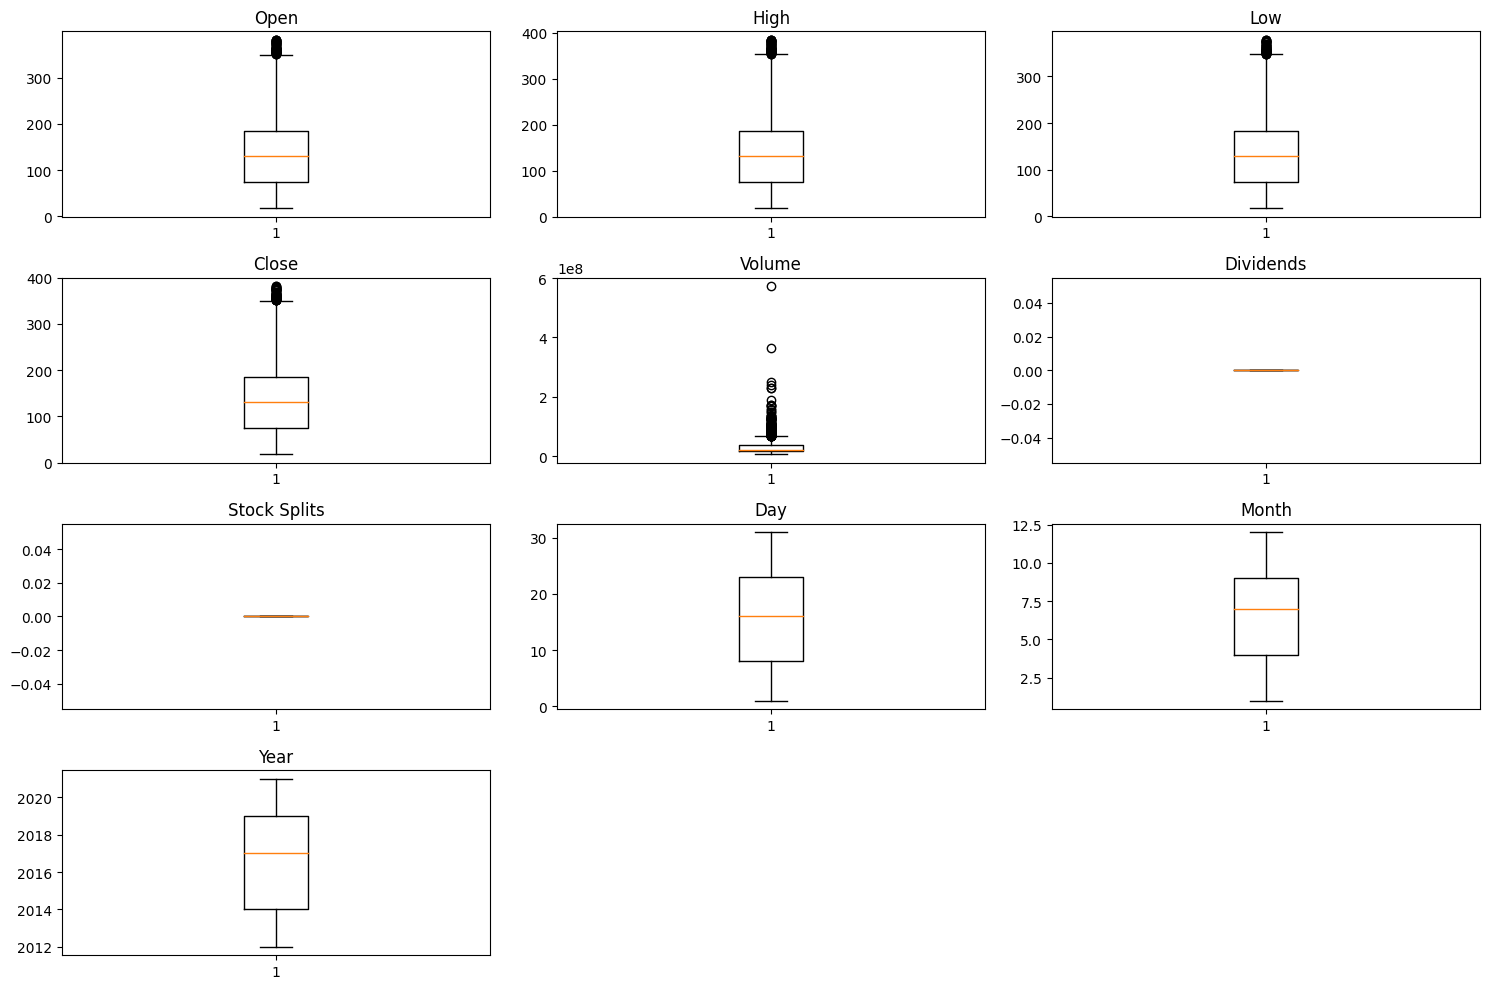

In [10]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

# Calculate the number of rows and columns for the subplot grid
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Arrange plots in a grid, dynamically calculating rows
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [11]:
# Iterate over relevant columns and handle outliers individually
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outlier indices
    outlier_indices = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Remove outliers from the DataFrame
    df = df[~outlier_indices]
    df.reindex()

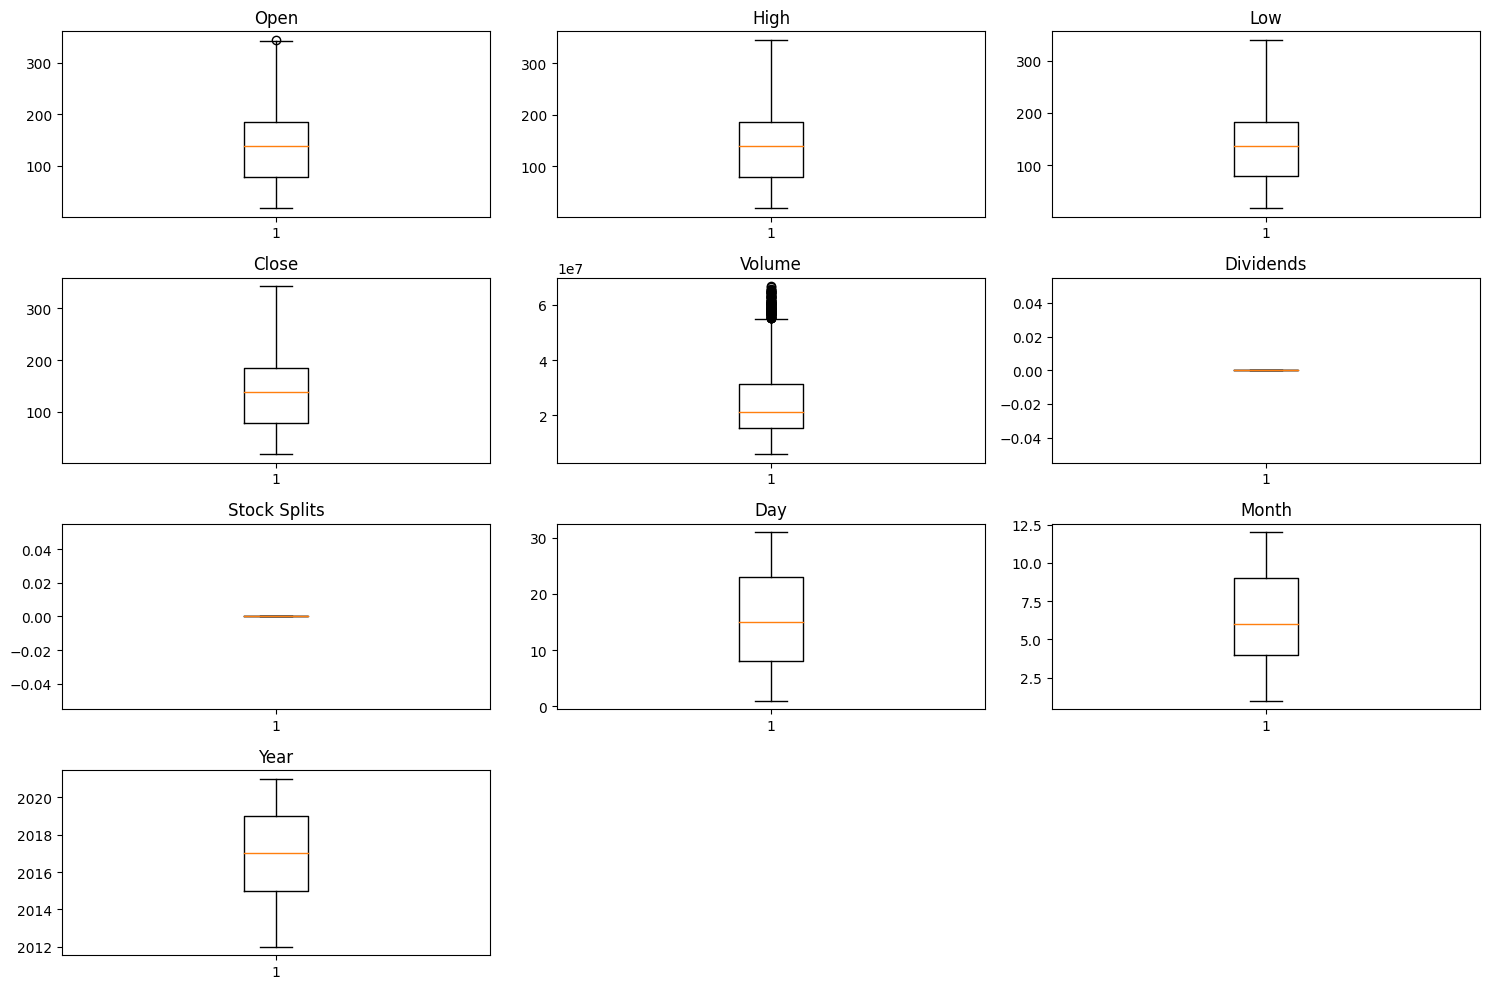

In [12]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

# Calculate the number of rows and columns for the subplot grid
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Arrange plots in a grid, dynamically calculating rows
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102 entries, 4 to 2358
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2102 non-null   float64
 1   High          2102 non-null   float64
 2   Low           2102 non-null   float64
 3   Close         2102 non-null   float64
 4   Volume        2102 non-null   int64  
 5   Dividends     2102 non-null   int64  
 6   Stock Splits  2102 non-null   int64  
 7   Day           2102 non-null   int32  
 8   Month         2102 non-null   int32  
 9   Year          2102 non-null   int32  
dtypes: float64(4), int32(3), int64(3)
memory usage: 156.0 KB


# Standarize the data

In [15]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply KMeans clustering on the data

In [16]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Visualize the data after using PCA for the dimensionality

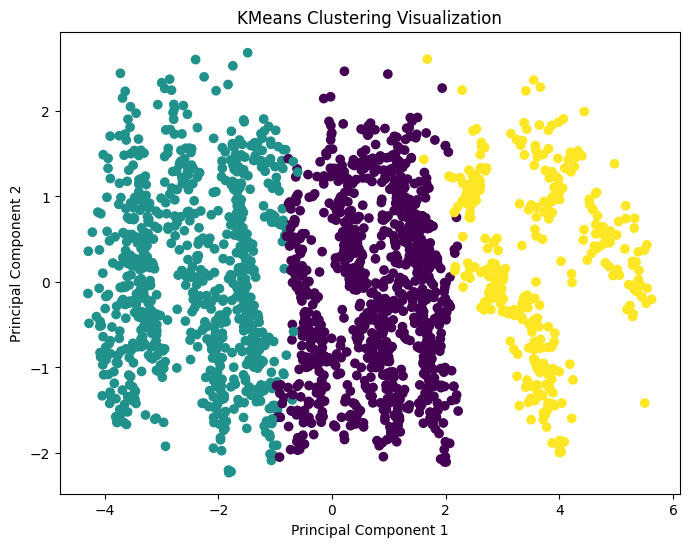

In [18]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()